# Inspect Extracted Noise

We extract "noise" in the `seasonal-decomposition` step. 
Here we analyse it via a **scatter matrix** to inspect correlations with the features.

In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
root = Path(r"..\data\ca_er1_fede")

df_noise = pd.read_pickle(root / "data\postprocessed" / "kc_noise.pickle").to_frame().reset_index()
df_noise.rename(columns={'resid': "Residual"}, inplace=True)
df_noise.index

RangeIndex(start=0, stop=1449, step=1)

## Scatter Plotting Noise

<AxesSubplot:>

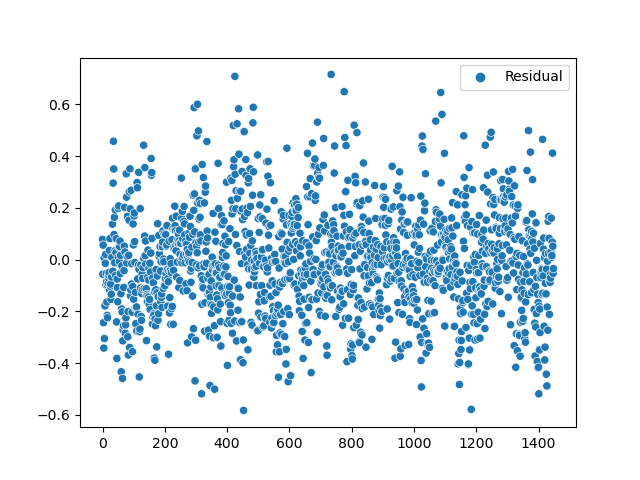

In [3]:
sns.scatterplot(df_noise)

### Noise colored by Day of Month

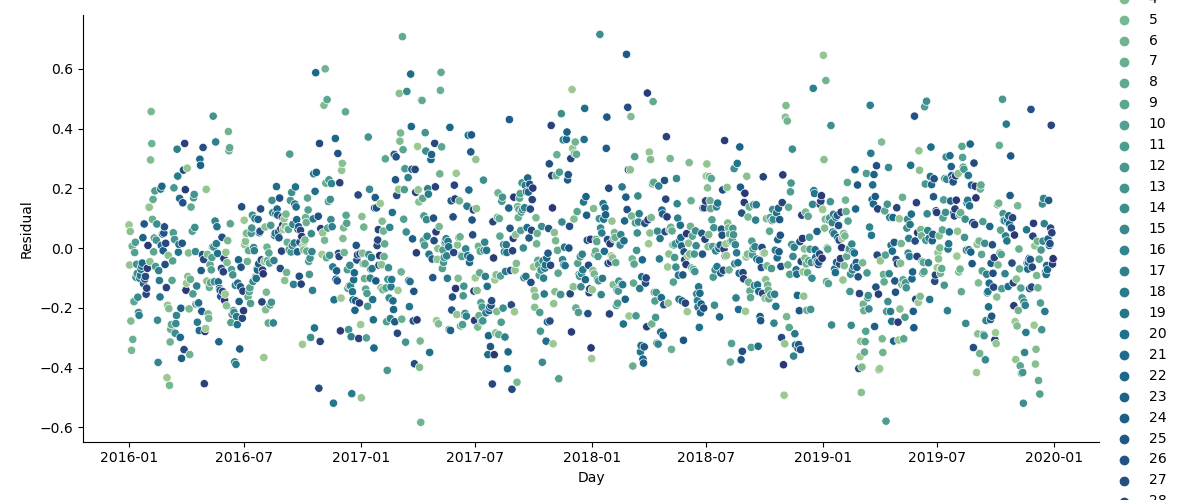

In [4]:
sns.relplot(df_noise, x="Day", y="Residual", kind="scatter", 
            hue=df_noise.apply(lambda x: str(x.loc["Day"].day), axis=1), palette="crest", 
            aspect=20/9)

*There is no evident pattern emerging from this figure, only that, **in Winter, values are more spread***.

## Correlation with Features

### Read Features Data

In [6]:
features_used = ["DOY", "Tmin", "Tmax", "Tdew", "Uwind", "Vwind", "Rs", "ETa"] 
df_fts = pd.read_pickle(root / "data/raw/data.pickle").loc[:, features_used].reset_index()
df_fts

,Day,DOY,Tmin,Tmax,Tdew,Uwind,Vwind,Rs,ETa
0,2016-01-01,1.0,268.424,271.022,266.299,4.371,1.060,4274972.0,NaN
1,2016-01-02,2.0,268.097,271.719,266.120,3.473,1.391,3272800.0,NaN
2,2016-01-03,3.0,266.913,271.987,267.221,3.825,-0.326,3968672.0,NaN
3,2016-01-04,4.0,256.742,266.049,256.240,-0.063,-2.721,8268880.0,NaN
4,2016-01-05,5.0,253.513,267.667,254.722,0.893,0.528,8281368.0,0.02
...,...,...,...,...,...,...,...,...,...
1456,2019-12-27,361.0,274.000,282.707,278.607,2.825,0.978,3044364.0,NaN
1457,2019-12-28,362.0,271.538,276.038,270.888,2.088,-0.264,7325324.0,NaN
1458,2019-12-29,363.0,272.189,273.939,271.491,-2.950,0.090,831244.0,NaN
1459,2019-12-30,364.0,273.383,278.973,273.851,-1.969,1.424,3530172.0,NaN


### Merge with Noise Data

pandas.core.series.Series

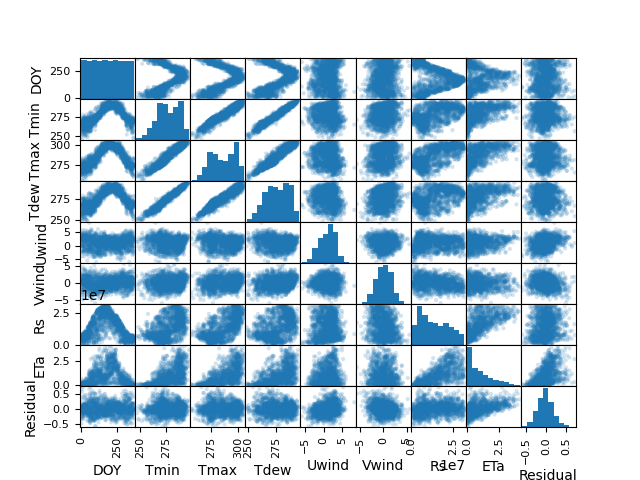

In [11]:
df = df_fts.merge(df_noise, on="Day")
pd.plotting.scatter_matrix(df, alpha=0.2)
type(df.corr(numeric_only=True)["Residual"])

### Plot Correlations

In [ ]:
df_melted = df.melt(id_vars=["Residual"], var_name="Feature")
df_melted

In [ ]:
def plot_correlation(data, x, y):
    g = sns.relplot(data, x=x, y=y, 
                    col="Feature", col_wrap=3, 
                    facet_kws={"sharey":True, "sharex":False}, height=3, aspect=4/3)
    # for i, f in enumerate(features_used):
    #     g.axes[i].set_xlabel(f)

    # Draw lines for the upper and right sides of each axis
    for ax in g.axes.flat:
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)

    # Adjust the titles of each subplot
    for ax in g.axes.flat:
        ax.set_title(ax.get_title(), y=.85)  # Adjust the y value as needed

    g.figure.subplots_adjust(wspace=0.03)

    plt.show()
    return g

plot_correlation(df_melted, "value", "Residual")